# Data Analysis: Revenue


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot_settings import colors_primary, colors_secondary, colors_mixed


df = pd.read_excel("merged_df.xlsx")
# df.head()

## Total revenue

In [2]:
total_revenue = df["Net_Revenue_EUR"].sum()
total_bet_amounts = df["Bet_Amt_EUR"].sum()

print(f"Total revenue: {round(total_revenue)} €")
print(f"Revenue %: {round(total_revenue / total_bet_amounts * 100)}")

Total revenue: 251796 €
Revenue %: 22


## Bet revenue 

Note:
- Bet revenue calculated from company's perspective & based on bet sessions.

In [3]:
columns_to_analyze = ['Net_Revenue_EUR', 'Net_Revenue_Percentage']


In [4]:
df[columns_to_analyze].describe()

,Net_Revenue_EUR,Net_Revenue_Percentage
count,630.000000,630.000000
mean,399.675791,38.179365
std,1932.804371,125.354979
min,-25936.946100,-1550.000000
25%,113.777925,8.000000
50%,328.185000,100.000000
75%,745.040536,100.000000
max,15831.141300,100.000000


- 👉 average profit per bet session: 400€ (38%)
- 👉 biggest profit on a bet session: 15k € (100%)
- 👉 biggest loss on a bet session: -26k € (-1550%)


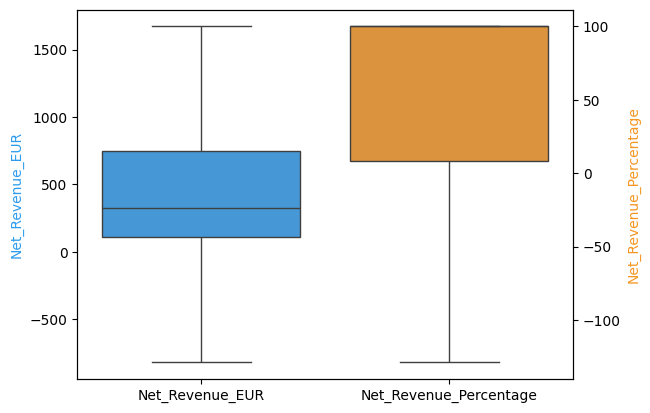

In [5]:
# box plot
# sns.boxplot(y="Net_Revenue_EUR", data=df)
# plt.show()

# box plot, hiding outliers
# sns.boxplot(data=df[columns_to_analyze], showfliers=False)
# plt.show()


c1 = colors_primary[0]
c2 = colors_secondary[0]

fig, ax1 = plt.subplots()

sns.boxplot(data=df[[columns_to_analyze[0]]], ax=ax1, showfliers=False, color=c1)
ax1.set_ylabel(columns_to_analyze[0], color=c1)

ax2 = ax1.twinx()
sns.boxplot(data=df[[columns_to_analyze[1]]], ax=ax2, showfliers=False, color=c2)
ax2.set_ylabel(columns_to_analyze[1], color=c2)

plt.show()

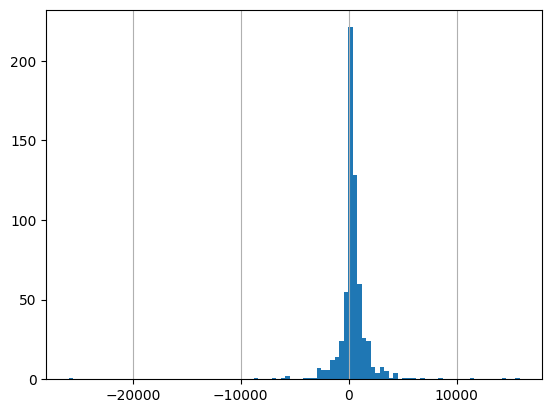

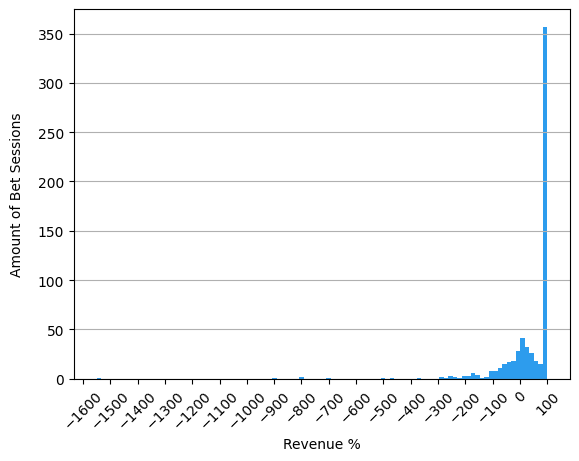

In [6]:
from matplotlib.ticker import MaxNLocator


df["Net_Revenue_EUR"].hist(bins=100)
plt.grid(axis='y')
plt.show()

df["Net_Revenue_Percentage"].hist(bins=100, color=colors_primary[0])
plt.xticks(rotation=45)
plt.xlabel("Revenue %")
plt.ylabel("Amount of Bet Sessions", labelpad=10)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.grid(axis='x')
plt.show()


In [7]:
# 
# Count number of bets with positive/negative profit 
# 


bets_with_profit = (df["Net_Revenue_EUR"] > 0).sum()
bets_with_loss =  (df["Net_Revenue_EUR"] <= 0).sum() # includes bets with zero profit

total_bets = len(df)


print(f"Number of bets with profit: {bets_with_profit} ({round(bets_with_profit/total_bets*100)}% of total bets)")
print(f"Number of bets with loss: {bets_with_loss} ({round(bets_with_loss/total_bets*100)}% of total bets)")
print("......")


#
# Count number of bets where the company makes 100% profit
#

bets_with_100_profit = len(df[df["Net_Revenue_Percentage"] == 100])

print(f"Number of bets with 100 profit: {bets_with_100_profit} ({round(bets_with_100_profit/total_bets*100)}% of total bets)")




Number of bets with profit: 490 (78% of total bets)
Number of bets with loss: 140 (22% of total bets)
......
Number of bets with 100 profit: 356 (57% of total bets)


- 👉 78% of bets are profitable
- 👉 57% of bets have a 100% profit (ie. user lost all the money)

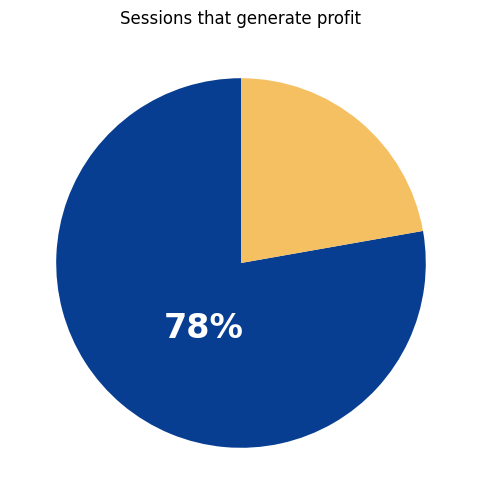

In [8]:
#
# Pie chart: profitable bet sessions
#

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    [bets_with_profit, bets_with_loss],
    autopct='%1.0f%%',
    colors=colors_mixed,
    startangle=90,
    textprops={'fontsize': 24, 'weight': 'bold'}
)

autotexts[0].set_color('white')
autotexts[0].set_weight('bold')
autotexts[0].set_position((-0.2, -0.35))  # text position

autotexts[1].set_color(colors_mixed[1])

plt.title("Sessions that generate profit")
plt.show()

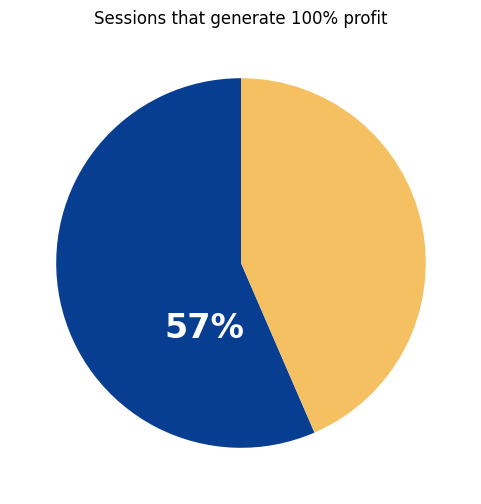

In [9]:
#
# Pie chart: bet sessions that generate 100% profit
#

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    [bets_with_100_profit, total_bets-bets_with_100_profit],
    autopct='%1.0f%%',
    colors=colors_mixed,
    startangle=90,
    textprops={'fontsize': 24, 'weight': 'bold'}
)

autotexts[0].set_color('white')
autotexts[0].set_weight('bold')
autotexts[0].set_position((-0.2, -0.35))  # text position

autotexts[1].set_color(colors_mixed[1])

plt.title("Sessions that generate 100% profit")
plt.show()

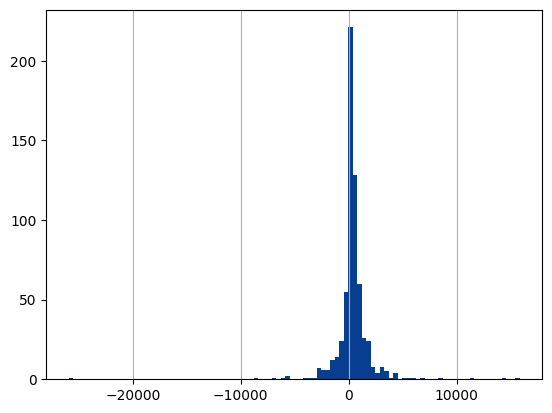

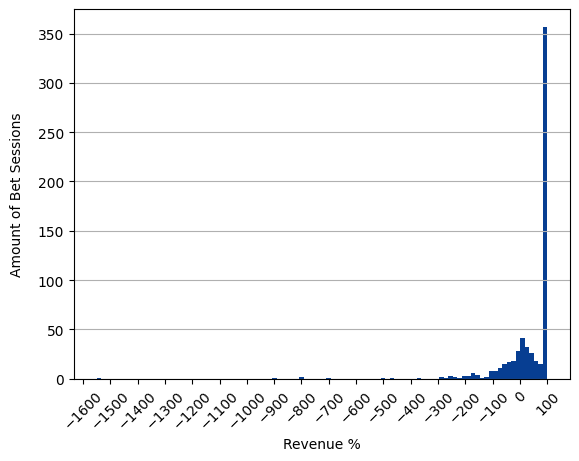

In [10]:
from matplotlib.ticker import MaxNLocator


df["Net_Revenue_EUR"].hist(bins=100, color=colors_mixed[0])
plt.grid(axis='y')
plt.show()

df["Net_Revenue_Percentage"].hist(bins=100, color=colors_mixed[0])
plt.xticks(rotation=45)
plt.xlabel("Revenue %")
plt.ylabel("Amount of Bet Sessions", labelpad=10)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.grid(axis='x')
plt.show()


In [11]:

def display_percentage_by_threshold(threshold):
    amount_of_bets = (df["Net_Revenue_Percentage"] >= threshold).sum()
    print(f"Number of bets with profit above or equals to {threshold}%: {amount_of_bets} ({round(amount_of_bets/total_bets*100)}% of total bets)")


for n in range(0, 110, 10):
    display_percentage_by_threshold(n)



Number of bets with profit above or equals to 0%: 495 (79% of total bets)
Number of bets with profit above or equals to 10%: 469 (74% of total bets)
Number of bets with profit above or equals to 20%: 443 (70% of total bets)
Number of bets with profit above or equals to 30%: 424 (67% of total bets)
Number of bets with profit above or equals to 40%: 406 (64% of total bets)
Number of bets with profit above or equals to 50%: 392 (62% of total bets)
Number of bets with profit above or equals to 60%: 377 (60% of total bets)
Number of bets with profit above or equals to 70%: 371 (59% of total bets)
Number of bets with profit above or equals to 80%: 361 (57% of total bets)
Number of bets with profit above or equals to 90%: 357 (57% of total bets)
Number of bets with profit above or equals to 100%: 356 (57% of total bets)


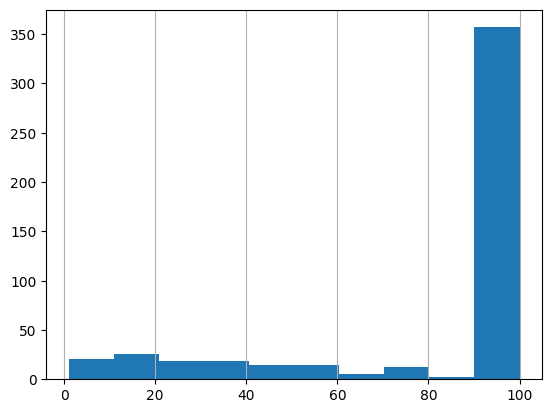

In [12]:
#
# distribution of profitable bets
#

only_profitable = df[df["Net_Revenue_Percentage"] > 0]

only_profitable["Net_Revenue_Percentage"].hist(bins=10)
plt.grid(axis='y')
plt.show()

## Bet profit percentage

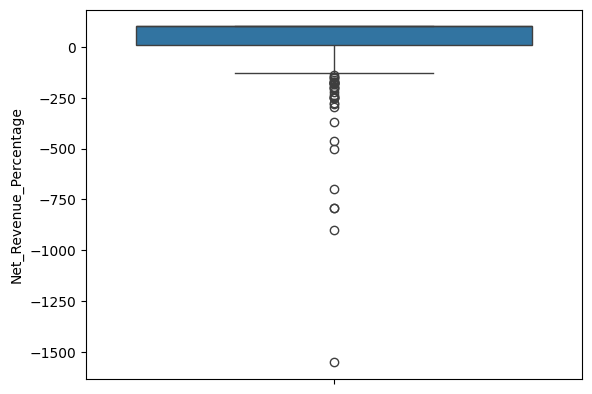

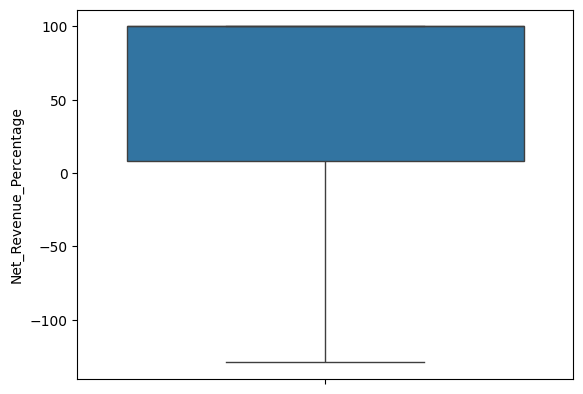

In [13]:
# box plots
sns.boxplot(data=df["Net_Revenue_Percentage"])
plt.show()

# box plots, hiding outliers
sns.boxplot(data=df["Net_Revenue_Percentage"], showfliers=False)
plt.show()

## Largest losses

In [14]:
largest_loss = df[df["Net_Revenue_Percentage"] == df["Net_Revenue_Percentage"].min() ]

largest_loss

,AccountNo,BetDate,ClassId,CategoryId,Source,BetCount,Bet_Amt,Win_Amt,Product,AccountNo_[0],...,sub_product,description,bet_or_play,AccountNo match?,Bet_Amt_EUR,Win_Amt_EUR,Full Name,Won the bet?,Net_Revenue_EUR,Net_Revenue_Percentage
561,00J381,30/09/2012,323,9,N,1,200.0,3300.78,Sportsbook,01284UW,...,Horse Racing,Horse Racing - Specials,1,False,234.0,3861.9126,Jim Morrison,True,-3627.9126,-1550


👉 Biggest loss: Sportsbook / Horse Racing

## Bets, win amounts, profit and profit percentage

In [15]:
columns_to_analyze = ['Bet_Amt_EUR', 'Win_Amt_EUR', 'Net_Revenue_EUR', "Net_Revenue_Percentage"]

In [16]:
df[columns_to_analyze].describe()

,Bet_Amt_EUR,Win_Amt_EUR,Net_Revenue_EUR,Net_Revenue_Percentage
count,630.000000,630.000000,630.000000,630.000000
mean,1819.780524,1420.104733,399.675791,38.179365
std,3288.531199,3403.747807,1932.804371,125.354979
min,148.854963,0.000000,-25936.946100,-1550.000000
25%,327.892500,0.000000,113.777925,8.000000
50%,597.138750,0.000000,328.185000,100.000000
75%,1612.855964,1105.269750,745.040536,100.000000
max,29364.000000,29657.546100,15831.141300,100.000000


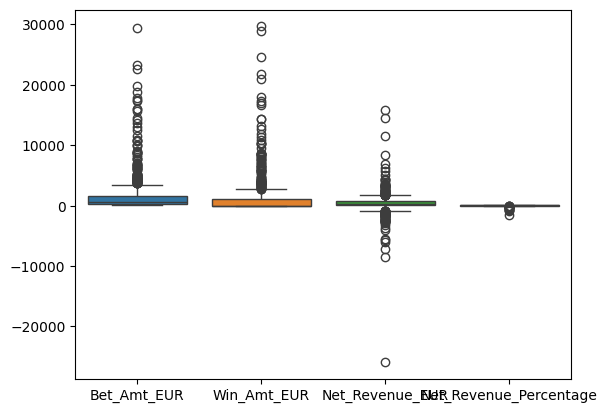

C:\Users\luis\AppData\Local\Temp\ipykernel_14256\3956619118.py:6: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(data=df[columns_to_analyze], showfliers=False,  palette=colors_mixed)


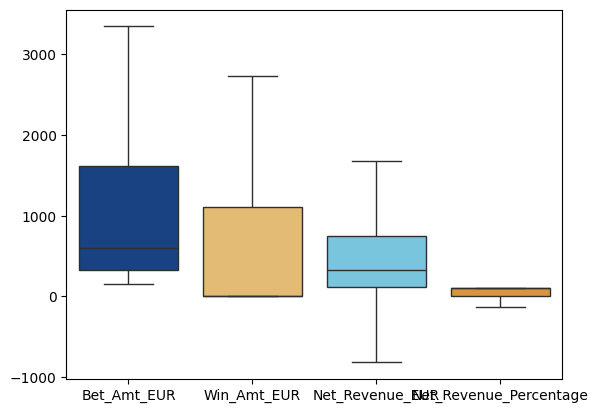

In [17]:
# box plots
sns.boxplot(data=df[columns_to_analyze])
plt.show()

# box plots, hiding outliers
sns.boxplot(data=df[columns_to_analyze], showfliers=False,  palette=colors_mixed)
plt.show()


## Profit per product

In [18]:
#
# ignore the product "Adjustments"
#

filtered_products_df = df[df["Product"] != "Adjustments"]

print(len(df))
print(len(filtered_products_df))

630
629


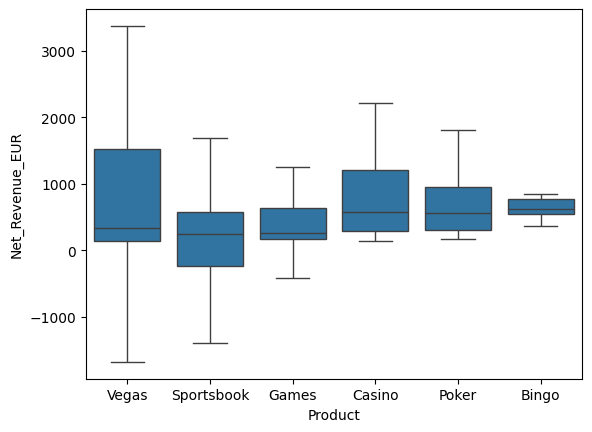

In [19]:
#
# Absolute
#

sns.boxplot(x="Product", y="Net_Revenue_EUR", data=filtered_products_df, showfliers=False)
plt.show()

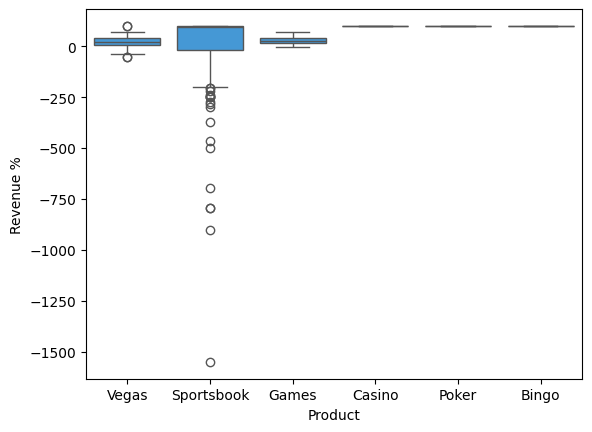

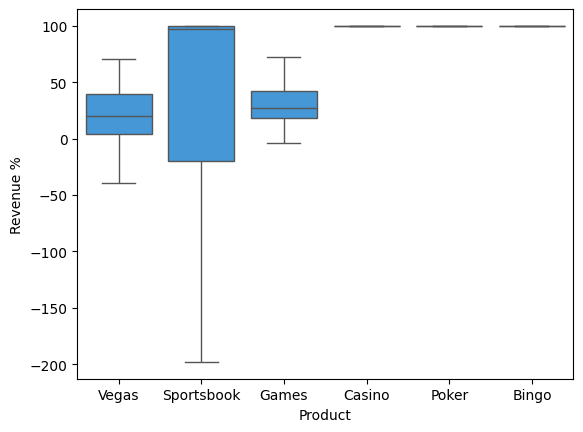

In [20]:
sns.boxplot(x="Product", y="Net_Revenue_Percentage", data=filtered_products_df, color=colors_primary[0])
plt.ylabel('Revenue %')
plt.show()

sns.boxplot(x="Product", y="Net_Revenue_Percentage", data=filtered_products_df, showfliers=False, color=colors_primary[0])
plt.ylabel('Revenue %')
plt.show()

## Profit per product -- 'Casino', 'Poker', 'Bingo'

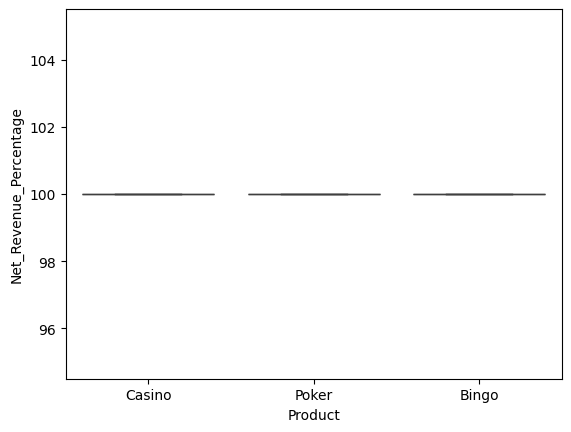

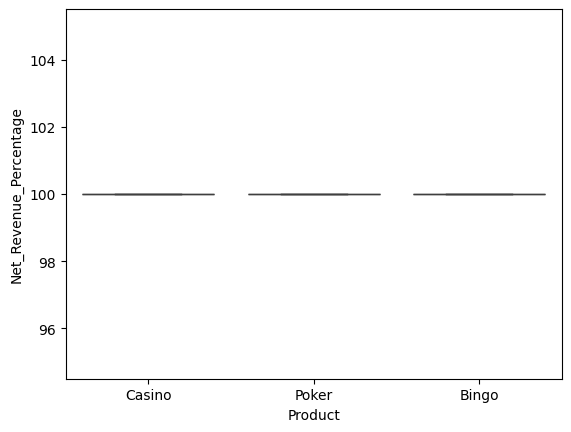

count    144.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: Net_Revenue_Percentage, dtype: float64

In [21]:
#
# zoom in for specific product categories
#


products_to_zoom_in = ['Casino', 'Poker', 'Bingo']

filtered_df = df[df["Product"].isin(products_to_zoom_in)]

sns.boxplot(x="Product", y="Net_Revenue_Percentage", data=filtered_df)
plt.show()

sns.boxplot(x="Product", y="Net_Revenue_Percentage", data=filtered_df, showfliers=False)
plt.show()


filtered_df["Net_Revenue_Percentage"].describe()

👉 some products have a 100% profit rate

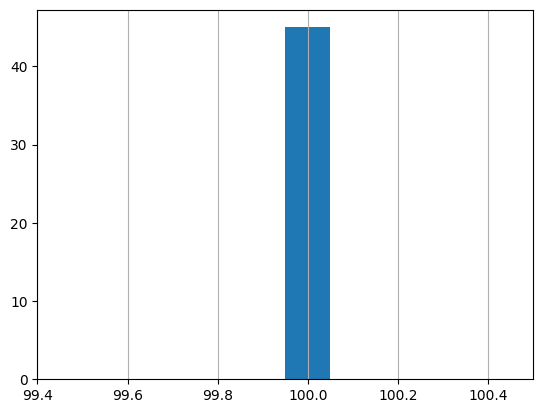

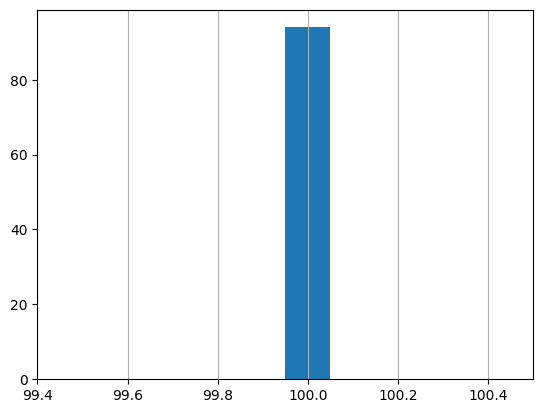

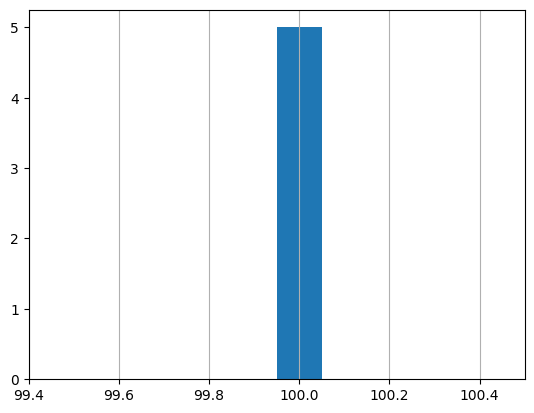

In [22]:
products_to_analyze = ['Casino', 'Poker', 'Bingo']


filtered_df = df[df["Product"].isin(products_to_analyze)]

# Casino
df[df["Product"] == 'Casino']["Net_Revenue_Percentage"].hist(align="left")
plt.grid(axis='y')
plt.show()

# Poker
df[df["Product"] == 'Poker']["Net_Revenue_Percentage"].hist(align="left")
plt.grid(axis='y')
plt.show()

# Bingo
df[df["Product"] == 'Bingo']["Net_Revenue_Percentage"].hist(align="left")
plt.grid(axis='y')
plt.show()


Product name: Casino
Number of bets with 100 profit: 45 (100% of total bets)


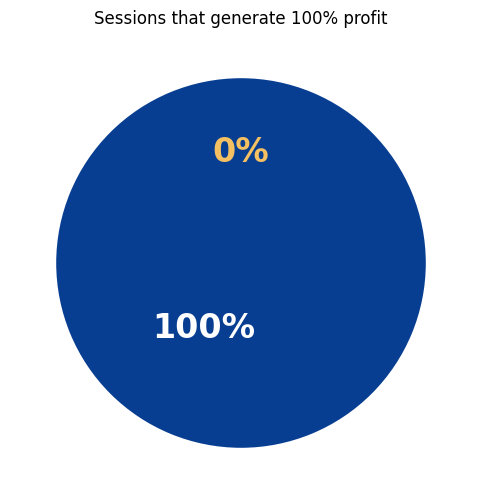

Product name: Poker
Number of bets with 100 profit: 94 (100% of total bets)


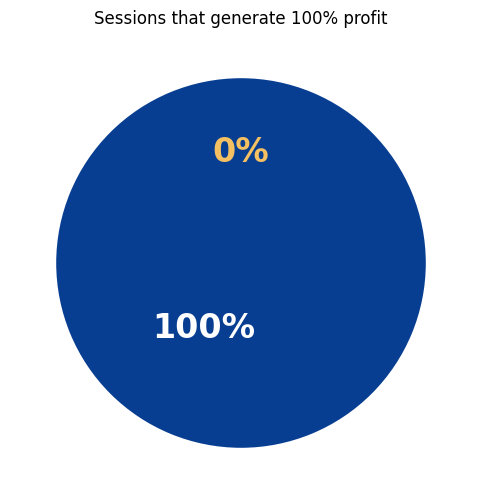

Product name: Bingo
Number of bets with 100 profit: 5 (100% of total bets)


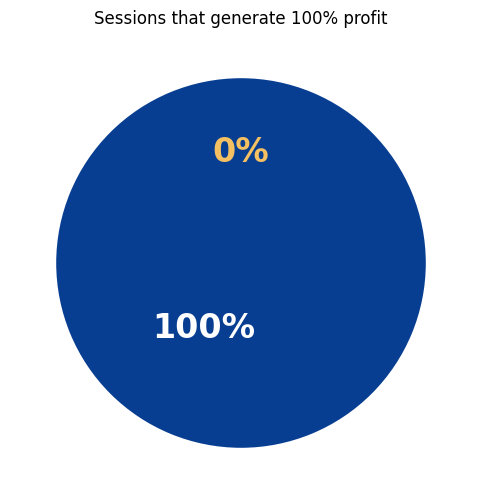

In [23]:
# 
# Render pie chart for each product
# 

def get_product_data(product_name):
    product_df = df[df["Product"] == product_name]
    total_product_bets = len(product_df)
    product_bets_with_100_profit = len(product_df[product_df["Net_Revenue_Percentage"] == 100])
    print(f"Product name: {product_name}")
    print(f"Number of bets with 100 profit: {product_bets_with_100_profit} ({round(product_bets_with_100_profit/total_product_bets*100)}% of total bets)")
    render_pie_100_profit(product_bets_with_100_profit, total_product_bets)

def render_pie_100_profit(product_bets_with_100_profit, total_product_bets):
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(
        [product_bets_with_100_profit, total_product_bets - product_bets_with_100_profit],
        autopct='%1.0f%%',
        colors=colors_mixed,
        startangle=90,
        textprops={'fontsize': 24, 'weight': 'bold'}
    )

    autotexts[0].set_color('white')
    autotexts[0].set_weight('bold')
    autotexts[0].set_position((-0.2, -0.35))  # text position
    autotexts[1].set_color(colors_mixed[1])

    plt.title("Sessions that generate 100% profit")
    plt.show()


for p in products_to_analyze:
        get_product_data(p)
